[Back](https://keqideng.github.io/data_analysis_portfolio_project/)
# Ontario Covid-19 Data Analysis
Date Sept 29 2021

Prepared by ***Keqi Deng***

Data Source: [Ontario Open Data](https://data.ontario.ca/en/dataset)

## Note
This analysis used public data provided by Ontario Public Health. The main purpose of this analysis is to find the correlation between different attributes. Analysis methods are not from academical research. The author of this report does not have background in epidemiology. This study is solely for data analysis demonstration purpose only.

## Analysis Goals
* Identify COVID-19 daily new case trend in districts with most COVID-19 cases
* Calculate the change percentage rate for daily COVID-19 cases
* Identify the districts with higher than average increasing rate
* Visualize the vaccination rate of different public health district
* Plot scatter plot to see if there's any correlation between recent daily case increasing rate and the vaccination rate
* Visualize the infection rate per 100k people in different age groups, comparing the vaccine effectiveness

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io
from _datetime import datetime
import wordcloud

## Import Data
In order to import the online csv datasets from public data, use the following instant function to simplify the process:

In [2]:
def df_csv(url):
    source = requests.get(url).text
    reader = io.StringIO(source)
    return pd.read_csv(reader)

Then, import [Status of COVID-19 cases in Ontario](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11) and [Daily change in cases by PHU](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f) datasets from Ontario Government website:

In [3]:
on_covid_status_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')
on_covid_status_df['Reported Date'] = pd.to_datetime(on_covid_status_df['Reported Date'])

print(on_covid_status_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 29 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Reported Date                                              602 non-null    datetime64[ns]
 1   Confirmed Negative                                         47 non-null     float64       
 2   Presumptive Negative                                       12 non-null     float64       
 3   Presumptive Positive                                       25 non-null     float64       
 4   Confirmed Positive                                         600 non-null    float64       
 5   Resolved                                                   590 non-null    float64       
 6   Deaths                                                     562 non-null    float64       
 7   Total Cases                        

In [4]:
phu_daily_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv')
phu_daily_df['Date'] = pd.to_datetime(phu_daily_df['Date'])

print(phu_daily_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            555 non-null    datetime64[ns]
 1   Algoma_District                 552 non-null    float64       
 2   Brant_County                    552 non-null    float64       
 3   Chatham_Kent                    552 non-null    float64       
 4   Durham_Region                   552 non-null    float64       
 5   Eastern_Ontario                 552 non-null    float64       
 6   Grey_Bruce                      552 non-null    float64       
 7   Haldimand_Norfolk               552 non-null    float64       
 8   Haliburton_Kawartha_Pine_Ridge  552 non-null    float64       
 9   Halton_Region                   552 non-null    float64       
 10  City_of_Hamilton                552 non-null    float64       
 11  Hastin

## Daily New Case Analysis
Calculate the rolling average of the different health regions:


In [5]:
phu_daily_avg_df = phu_daily_df.rolling(window = 7).mean()
phu_daily_avg_df.drop('Total', axis = 1, inplace = True)
phu_daily_avg_df['Date'] = phu_daily_df.Date
phu_daily_avg_df.dropna(how='any', inplace=True)
print(phu_daily_avg_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 12 to 554
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Algoma_District                 543 non-null    float64       
 1   Brant_County                    543 non-null    float64       
 2   Chatham_Kent                    543 non-null    float64       
 3   Durham_Region                   543 non-null    float64       
 4   Eastern_Ontario                 543 non-null    float64       
 5   Grey_Bruce                      543 non-null    float64       
 6   Haldimand_Norfolk               543 non-null    float64       
 7   Haliburton_Kawartha_Pine_Ridge  543 non-null    float64       
 8   Halton_Region                   543 non-null    float64       
 9   City_of_Hamilton                543 non-null    float64       
 10  Hastings_Prince_Edward          543 non-null    float64       
 11  Huron

Plot the result

<AxesSubplot:>

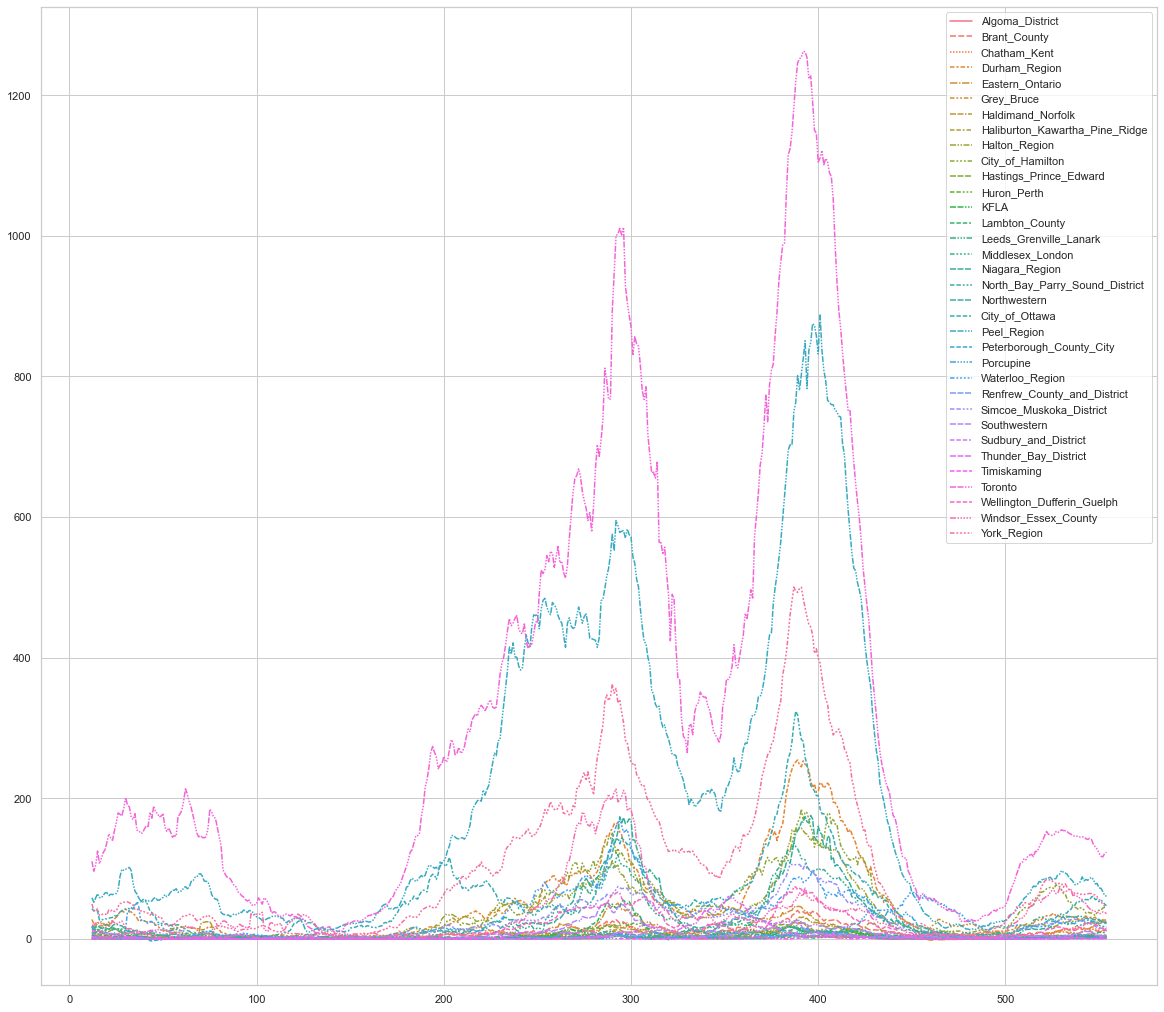

In [6]:
plt.figure(figsize=(20,18))
sns.set_theme(style="whitegrid", palette="colorblind")
sns.lineplot(data = phu_daily_avg_df)

We realize that it is hard to show the trend for specific regions.

In order to do that, we would like to focus on top 4 regions with top average daily cases:

In [7]:
phu_daily_df.mean().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_10785/3503816743.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  phu_daily_df.mean().sort_values(ascending=False)


Total                             1054.353153
Toronto                            314.039855
Peel_Region                        206.842391
York_Region                        102.036232
City_of_Ottawa                      53.862319
Durham_Region                       48.802536
City_of_Hamilton                    44.201087
Windsor_Essex_County                35.617754
Waterloo_Region                     35.514493
Halton_Region                       34.012681
Niagara_Region                      31.760870
Middlesex_London                    25.264493
Simcoe_Muskoka_District             24.565217
Wellington_Dufferin_Guelph          16.405797
Eastern_Ontario                      9.364130
Brant_County                         8.048913
Southwestern                         7.739130
Lambton_County                       6.983696
Thunder_Bay_District                 6.146739
Haldimand_Norfolk                    5.226449
Haliburton_Kawartha_Pine_Ridge       4.411232
Chatham_Kent                      

The regions with top 4 daily COVID-19 cases are Toronto, Peel, York and Ottawa.

First we stack the data from different regions for graphing:

In [8]:
phu_top_four_df = phu_daily_avg_df[['Date','Toronto','Peel_Region','York_Region','City_of_Ottawa']]
phu_top_four_df.set_index('Date', inplace=True)
phu_top_four_stack_df = pd.DataFrame(phu_top_four_df.stack().reset_index())
phu_top_four_stack_df.rename(columns={'level_1':'PHU',0:'7day_avg_infc'}, inplace=True)
print(phu_top_four_stack_df.head(5))

        Date             PHU  7day_avg_infc
0 2020-04-05         Toronto     110.428571
1 2020-04-05     Peel_Region      58.571429
2 2020-04-05     York_Region      49.714286
3 2020-04-05  City_of_Ottawa      43.000000
4 2020-04-06         Toronto      96.285714


Then use ```Seaborn``` for graphing:


<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

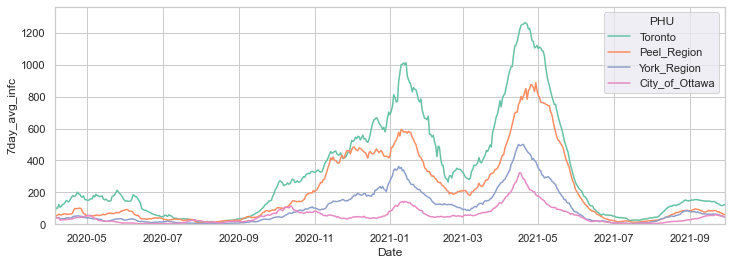

In [9]:
fig = plt.figure(figsize=(12,4))
plt.xlim(phu_top_four_stack_df.Date.min(),phu_top_four_stack_df.Date.max())
plt.ylim(0,phu_top_four_stack_df['7day_avg_infc'].max()+100)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

Separate to 4 small plots:

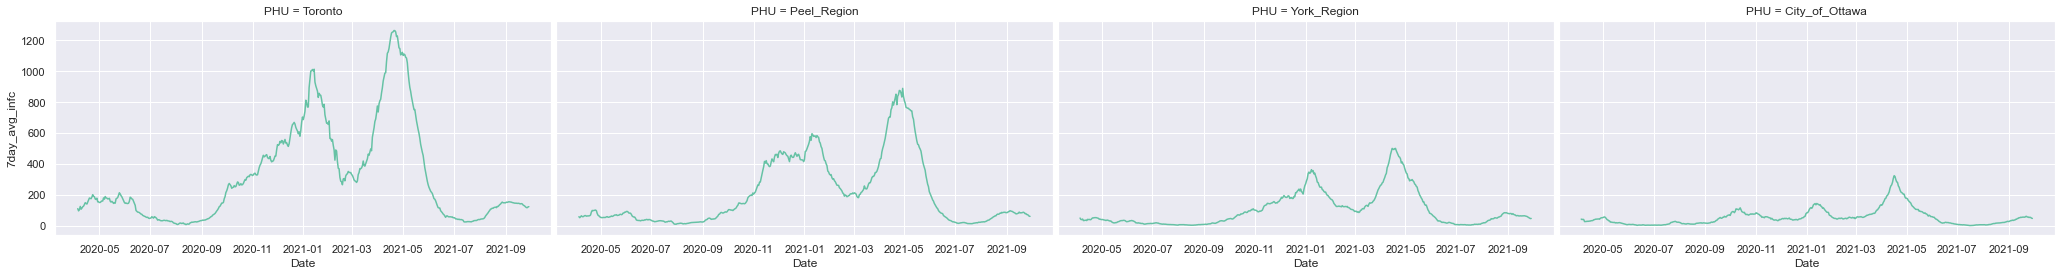

In [10]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_top_four_stack_df, col='PHU', margin_titles=True, despine=False, height=4, aspect=1.8)
fig.map(sns.lineplot, 'Date', '7day_avg_infc')
fig.figure.subplots_adjust(wspace=0.01)

Calculate the daily change rate of four different health regions:

In [11]:
phu_top_four_pct_df = phu_top_four_df.pct_change().dropna()
phu_four_reg_pct_stack = pd.DataFrame(phu_top_four_pct_df.stack()).reset_index()
phu_four_reg_pct_stack.rename(columns={'level_1':'PHU',0:'avg_inf'}, inplace=True)
print(phu_four_reg_pct_stack.head(5))

        Date             PHU   avg_inf
0 2020-04-06         Toronto -0.128072
1 2020-04-06     Peel_Region -0.109756
2 2020-04-06     York_Region -0.186782
3 2020-04-06  City_of_Ottawa -0.076412
4 2020-04-07         Toronto  0.089021


Use the same method to plot in order to compare trend:

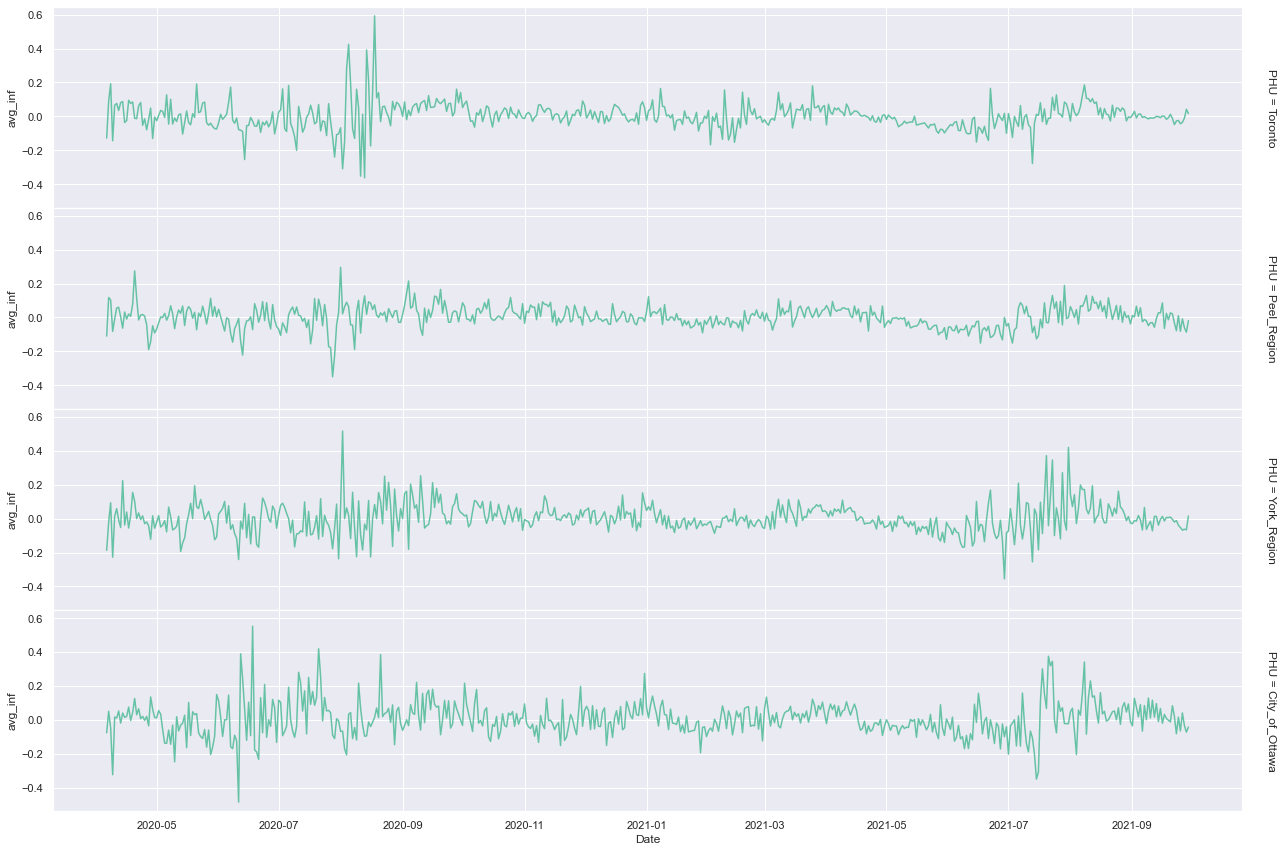

In [12]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_four_reg_pct_stack, row='PHU', margin_titles=True, despine=False, height=3, aspect=6)
fig.map(sns.lineplot, 'Date', 'avg_inf')
fig.figure.subplots_adjust(hspace=0)

For the past 30 days:

<AxesSubplot:xlabel='Date', ylabel='avg_inf'>

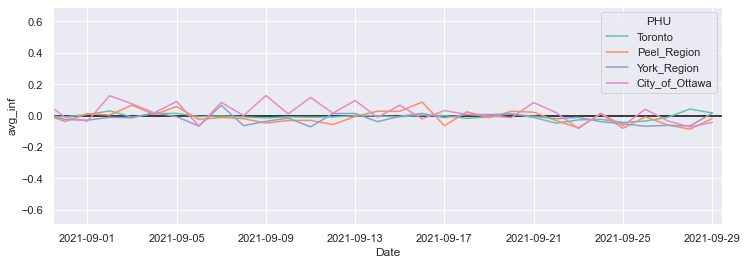

In [13]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(-phu_four_reg_pct_stack.avg_inf.max()-0.1,phu_four_reg_pct_stack.avg_inf.max()+0.1)
sns.set_theme(style='darkgrid', palette='Set2')
plt.axhline(y=0, color='black')
sns.lineplot(data=phu_four_reg_pct_stack, x = 'Date', y = 'avg_inf', hue='PHU')

<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

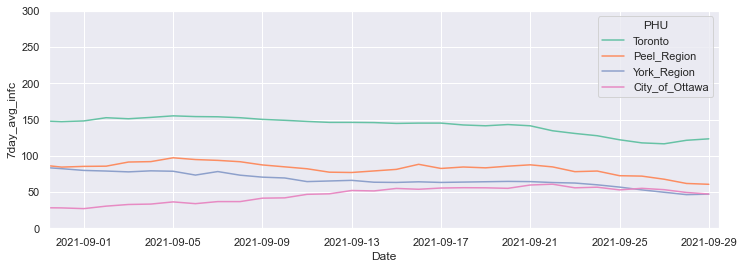

In [14]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(0,300)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

We can see that as the infection cases go up in Ontario, the daily new infected patient in Toronto, Peel and York Region are not significantly increased at lease for the past two weeks. Use the following methods to find out which region have the highest increase rate:

In [15]:
phu_pct_df = phu_daily_df.iloc[:,1:].pct_change()
phu_pct_df['Date'] = phu_daily_df.Date

#Calculate the region with highest increasing rate for the past week:
phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_10785/1285918203.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)


Algoma_District                         inf
Leeds_Grenville_Lanark                  inf
Sudbury_and_District                    inf
Timiskaming                             inf
Northwestern                            inf
North_Bay_Parry_Sound_District          inf
Porcupine                               inf
Haldimand_Norfolk                       inf
Grey_Bruce                              inf
Brant_County                      24.731935
Southwestern                       7.314286
Lambton_County                     6.515657
Hastings_Prince_Edward             5.516667
Durham_Region                      4.395659
Haliburton_Kawartha_Pine_Ridge     3.666667
Chatham_Kent                       2.687010
Huron_Perth                        1.577381
Wellington_Dufferin_Guelph         1.444762
York_Region                        1.228928
Halton_Region                      1.221068
City_of_Hamilton                   1.076450
KFLA                               0.991667
Middlesex_London                

In order to make sense of the infinite value, make a pseudo dataset where we replace 0 to 0.1, then rank the infection case increasing rate for the past week:

In [16]:
pseudo_phu_df = phu_daily_df.replace(0,0.8)

#Percentage Change:
pseudo_phu_pct_df = pseudo_phu_df.iloc[:,1:].pct_change()
pseudo_phu_pct_df['Date'] = pseudo_phu_df.Date

#Region increasing rate ranking for the past 7 days:
phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)
phu_change_rate

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_10785/847449014.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)


Brant_County                      24.731935
Southwestern                       7.314286
Lambton_County                     6.515657
Porcupine                          6.471429
Hastings_Prince_Edward             5.516667
Sudbury_and_District               4.856061
Durham_Region                      4.395659
Leeds_Grenville_Lanark             4.343333
Haldimand_Norfolk                  4.200000
Timiskaming                        4.166667
Haliburton_Kawartha_Pine_Ridge     3.666667
Northwestern                       3.200000
Chatham_Kent                       2.687010
Renfrew_County_and_District        1.776667
Huron_Perth                        1.577381
Wellington_Dufferin_Guelph         1.444762
York_Region                        1.228928
Halton_Region                      1.221068
Grey_Bruce                         1.150000
City_of_Hamilton                   1.076450
KFLA                               0.991667
Middlesex_London                   0.962231
Niagara_Region                  

Using ```wordcloud``` to  see which public health district has the highest COVID-19 daily new case increasing rate:

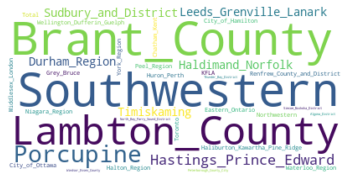

In [17]:
phu_change_rate_df = pd.DataFrame(phu_change_rate)
phu_change_rate_df.columns = ['change_rate']

text = ' '.join(phu for phu in phu_change_rate_df.index)
wc = wordcloud.WordCloud(background_color='white').generate(text=text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
'''
Here we can get a list of health regions
that with daily case count increasing rate
higher than provincial average:
'''
abov_avg_phu = phu_change_rate[phu_change_rate.values>phu_change_rate['Total']]
phu_list = np.array(abov_avg_phu.index)
phu_list


array(['Brant_County', 'Southwestern', 'Lambton_County', 'Porcupine',
       'Hastings_Prince_Edward', 'Sudbury_and_District', 'Durham_Region',
       'Leeds_Grenville_Lanark', 'Haldimand_Norfolk', 'Timiskaming',
       'Haliburton_Kawartha_Pine_Ridge', 'Northwestern', 'Chatham_Kent',
       'Renfrew_County_and_District', 'Huron_Perth',
       'Wellington_Dufferin_Guelph', 'York_Region', 'Halton_Region',
       'Grey_Bruce', 'City_of_Hamilton', 'KFLA', 'Middlesex_London',
       'Niagara_Region', 'City_of_Ottawa', 'Eastern_Ontario', 'Toronto',
       'Peel_Region'], dtype=object)

## Vaccination Data Analysis
Data from Ontario OpenData [COVID-19 Vaccine data by Public Health Unit](https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/2a362139-b782-43b1-b3cb-078a2ef19524), updated daily.

In [19]:
#Data from Ontario OpenData, updated daily
on_vaxx_df = df_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/2a362139-b782-43b1-b3cb-078a2ef19524/download/vaccines_by_age_phu.csv')
on_vaxx_df['Date'] = pd.to_datetime(on_vaxx_df.Date)
on_vaxx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          25399 non-null  datetime64[ns]
 1   PHU ID                        25399 non-null  int64         
 2   PHU name                      25399 non-null  object        
 3   Agegroup                      25399 non-null  object        
 4   At least one dose_cumulative  25399 non-null  int64         
 5   Second_dose_cumulative        25007 non-null  float64       
 6   Total population              25399 non-null  int64         
 7   Percent_at_least_one_dose     22440 non-null  float64       
 8   Percent_fully_vaccinated      22440 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [20]:
on_vaxx_df.Date

0       2021-07-26
1       2021-07-26
2       2021-07-26
3       2021-07-26
4       2021-07-26
           ...    
25394   2021-09-29
25395   2021-09-29
25396   2021-09-29
25397   2021-09-29
25398   2021-09-29
Name: Date, Length: 25399, dtype: datetime64[ns]

In [21]:
#Find the most recent data:

on_vaxx_rn_df = on_vaxx_df[on_vaxx_df.Date == np.datetime64(datetime.today().date())]
on_vaxx_rn_df

,Date,PHU ID,PHU name,Agegroup,At least one dose_cumulative,Second_dose_cumulative,Total population,Percent_at_least_one_dose,Percent_fully_vaccinated
25014,2021-09-29,2226,ALGOMA DISTRICT,12-17yrs,5011,4312.0,6504,0.7704,0.6630
25015,2021-09-29,2227,BRANT COUNTY,12-17yrs,7855,6831.0,10734,0.7318,0.6364
25016,2021-09-29,2240,CHATHAM-KENT,12-17yrs,4566,3749.0,7233,0.6313,0.5183
25017,2021-09-29,2237,CITY OF HAMILTON,12-17yrs,28815,24603.0,37018,0.7784,0.6646
25018,2021-09-29,2251,CITY OF OTTAWA,12-17yrs,61313,55273.0,66222,0.9259,0.8347
...,...,...,...,...,...,...,...,...,...
25394,2021-09-29,9999,UNKNOWN,Undisclosed_or_missing,38,21.0,0,NaN,NaN
25395,2021-09-29,2265,WATERLOO REGION,Undisclosed_or_missing,19,5.0,0,NaN,NaN
25396,2021-09-29,2266,WELLINGTON-DUFFERIN-GUELPH,Undisclosed_or_missing,16,3.0,0,NaN,NaN
25397,2021-09-29,2268,WINDSOR-ESSEX COUNTY,Undisclosed_or_missing,21,7.0,0,NaN,NaN


In [22]:
pd.value_counts(on_vaxx_rn_df['Agegroup'])

12-17yrs                  35
18-29yrs                  35
30-39yrs                  35
40-49yrs                  35
50-59yrs                  35
60-69yrs                  35
70-79yrs                  35
80+                       35
Adults_18plus             35
Ontario_12plus            35
Undisclosed_or_missing    35
Name: Agegroup, dtype: int64

In [23]:
#First we ignore the age group difference, focus on the district
on_vaxx_rn_df = on_vaxx_rn_df[on_vaxx_rn_df.Agegroup == 'Ontario_12plus']
on_vaxx_piv = pd.pivot_table(data=on_vaxx_rn_df, values=['At least one dose_cumulative','Second_dose_cumulative','Total population'], index=['PHU ID','PHU name'], aggfunc=np.sum)
on_vaxx_piv

,,At least one dose_cumulative,Second_dose_cumulative,Total population
PHU ID,PHU name,,,
2226,ALGOMA DISTRICT,88935,82902.0,101417
2227,BRANT COUNTY,113194,105383.0,134281
2230,DURHAM REGION,542114,512729.0,617305
2233,GREY BRUCE,125167,118509.0,149060
2234,HALDIMAND-NORFOLK,83680,78015.0,100272
2235,"HALIBURTON, KAWARTHA, PINE RIDGE",148226,138854.0,170498
2236,HALTON REGION,472828,451605.0,533442
2237,CITY OF HAMILTON,431665,400266.0,519560
2238,HASTINGS & PRINCE EDWARD COUNTIES,126745,117260.0,149606


In [24]:
#Calculate the percentage
on_vaxx_piv['one_dose_pect'] = on_vaxx_piv['At least one dose_cumulative']/on_vaxx_piv['Total population']
on_vaxx_piv['full_vaxx_pect'] = on_vaxx_piv['Second_dose_cumulative']/on_vaxx_piv['Total population']
on_vaxx_piv.sort_values(by='full_vaxx_pect', ascending=False, inplace=True)
on_vaxx_piv.reset_index(inplace=True)
on_vaxx_piv

,PHU ID,PHU name,At least one dose_cumulative,Second_dose_cumulative,Total population,one_dose_pect,full_vaxx_pect
0,9999,UNKNOWN,11211,5278.0,0,inf,inf
1,2243,"LEEDS, GRENVILLE AND LANARK DISTRICT",147283,139734.0,154361,0.954146,0.905242
2,2262,THUNDER BAY DISTRICT,120139,111784.0,131784,0.911636,0.848237
3,2236,HALTON REGION,472828,451605.0,533442,0.886372,0.846587
4,2265,WATERLOO REGION,454020,426915.0,506304,0.896734,0.843199
5,2251,CITY OF OTTAWA,821365,773482.0,922751,0.890126,0.838235
6,5183,HURON PERTH,107175,100977.0,120844,0.886887,0.835598
7,2230,DURHAM REGION,542114,512729.0,617305,0.878195,0.830593
8,2266,WELLINGTON-DUFFERIN-GUELPH,236236,223796.0,270024,0.874870,0.828800
9,2244,MIDDLESEX-LONDON,394251,367927.0,444194,0.887565,0.828302


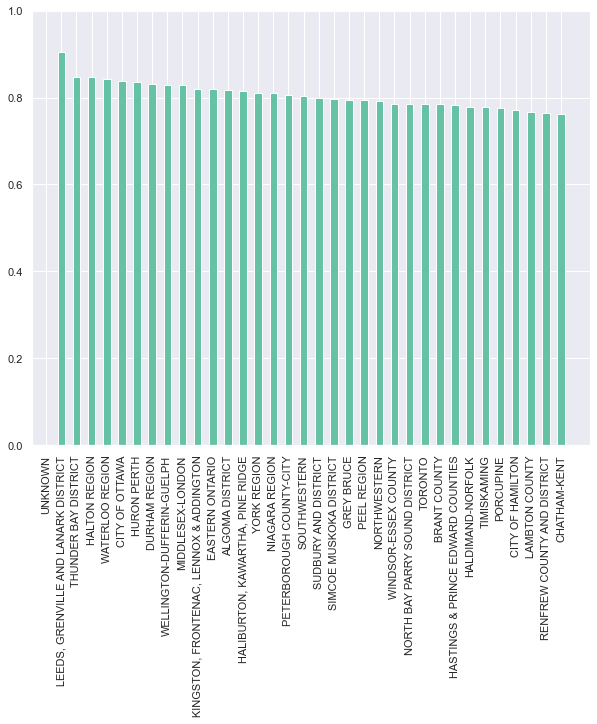

In [25]:
plt.figure(figsize=(10,8))
plt.bar(data=on_vaxx_piv,x='PHU name',height='full_vaxx_pect', width=0.5)
plt.ylim(0,1)
#put x label vertical for easier visual
plt.xticks(ticks=range(len(on_vaxx_piv)), labels=on_vaxx_piv['PHU name'], rotation=90)
plt.show()

## Correlation of Vaccination Rate and Daily Case Percentage Change

In [26]:
'''
Find Correlation between
vaccination rate and
covid case increasing rate:
'''

#prepare data for plotting
on_vaxx_piv.drop(labels=0, inplace=True)

In [27]:
on_vaxx_piv.sort_values(by='PHU name', inplace=True)
on_vaxx_piv.reset_index(inplace=True)
len(on_vaxx_piv)

34

In [28]:
phu_sum = phu_daily_df.set_index('Date')
phu_sum.fillna(0,inplace=True)
phu_sum = phu_sum.cumsum()
phu_sum=phu_sum.pct_change().dropna()
#consider the average of previous 2 weeks
phu_sum=phu_sum[phu_sum.index>(np.datetime64(datetime.today().date())-np.timedelta64(14,'D'))]
phu_mean=pd.DataFrame(phu_sum.mean())
phu_mean.reset_index(inplace=True)
phu_mean.drop(labels=34, inplace=True)
phu_mean.columns=['phu','rate']
phu_mean.sort_values(by='phu', inplace=True)
phu_mean.reset_index(inplace=True)
len(phu_mean)

34

In [29]:
#join two tables
phu_vax_n_chg = phu_mean.copy()
phu_vax_n_chg['PHU name'] = on_vaxx_piv['PHU name']
phu_vax_n_chg['one_dose_pct'] = on_vaxx_piv['one_dose_pect']
phu_vax_n_chg['full_vax_pct'] = on_vaxx_piv['full_vaxx_pect']
phu_vax_n_chg

,index,phu,rate,PHU name,one_dose_pct,full_vax_pct
0,0,Algoma_District,0.002972,ALGOMA DISTRICT,0.876924,0.817437
1,1,Brant_County,0.002491,BRANT COUNTY,0.842964,0.784795
2,2,Chatham_Kent,0.005678,CHATHAM-KENT,0.825938,0.761029
3,9,City_of_Hamilton,0.001699,CITY OF HAMILTON,0.830828,0.770394
4,19,City_of_Ottawa,0.001844,CITY OF OTTAWA,0.890126,0.838235
5,3,Durham_Region,0.001067,DURHAM REGION,0.878195,0.830593
6,4,Eastern_Ontario,0.004120,EASTERN ONTARIO,0.879998,0.818814
7,5,Grey_Bruce,0.000830,GREY BRUCE,0.839709,0.795042
8,6,Haldimand_Norfolk,0.001351,HALDIMAND-NORFOLK,0.834530,0.778034
9,7,Haliburton_Kawartha_Pine_Ridge,0.001845,"HALIBURTON, KAWARTHA, PINE RIDGE",0.869371,0.814403


<AxesSubplot:xlabel='rate', ylabel='full_vax_pct'>

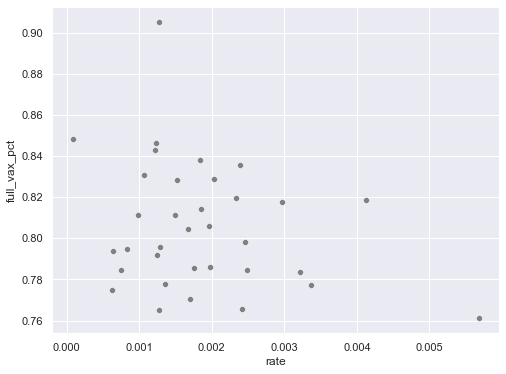

In [30]:
'''
plot seaborn.scatterplot between vaccination rate
and recent daily positive case change rate
'''

plt.figure(figsize=(8,6))
sns.scatterplot(data=phu_vax_n_chg, x='rate', y='full_vax_pct', markers='*', color='grey')

<Figure size 576x432 with 0 Axes>

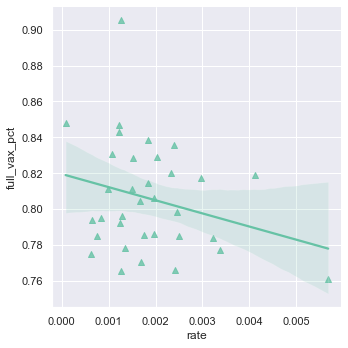

In [31]:
plt.figure(figsize=(8,6))
sns.lmplot(data=phu_vax_n_chg, x='rate', y='full_vax_pct',markers='^')

## Case Rate by Vaccination Status
Data source credit to [Ontario Government Open Data](https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/c08620e0-a055-4d35-8cec-875a459642c3)

In [32]:
on_rate_by_vax = df_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/c08620e0-a055-4d35-8cec-875a459642c3/download/cases_by_age_vac_status.csv')
#Use the most up to date data
on_rate_by_vax['date'] = pd.to_datetime(on_rate_by_vax.date)
on_rate_by_vax = on_rate_by_vax[on_rate_by_vax.date == np.datetime64(datetime.now().date())]
on_rate_by_vax

,date,agegroup,cases_unvac_rate_per100K,cases_partial_vac_rate_per100K,cases_full_vac_rate_per100K,cases_unvac_rate_7ma,cases_partial_vac_rate_7ma,cases_full_vac_rate_7ma
112,2021-09-29,0-11yrs,4.32,12.00,0.00,6.25,4.15,0.00
113,2021-09-29,12-17yrs,10.93,7.34,0.60,15.08,4.17,0.95
114,2021-09-29,18-39yrs,11.90,3.66,1.27,13.52,5.25,1.84
115,2021-09-29,40-59yrs,11.89,4.63,1.60,11.41,5.39,1.65
116,2021-09-29,60-79yrs,11.82,3.96,0.68,12.97,3.14,0.89
117,2021-09-29,80+,25.41,0.00,0.48,32.64,2.17,1.12
118,2021-09-29,ALL,8.20,4.44,1.12,9.83,4.85,1.43


In [33]:
on_rate_by_vax.set_index('agegroup',inplace=True)

In [34]:
on_rate_by_vax.drop(columns=['date'],inplace=True)
on_rate_by_vax

,cases_unvac_rate_per100K,cases_partial_vac_rate_per100K,cases_full_vac_rate_per100K,cases_unvac_rate_7ma,cases_partial_vac_rate_7ma,cases_full_vac_rate_7ma
agegroup,,,,,,
0-11yrs,4.32,12.00,0.00,6.25,4.15,0.00
12-17yrs,10.93,7.34,0.60,15.08,4.17,0.95
18-39yrs,11.90,3.66,1.27,13.52,5.25,1.84
40-59yrs,11.89,4.63,1.60,11.41,5.39,1.65
60-79yrs,11.82,3.96,0.68,12.97,3.14,0.89
80+,25.41,0.00,0.48,32.64,2.17,1.12
ALL,8.20,4.44,1.12,9.83,4.85,1.43


In [35]:
#Stack the data for ploting
rate_by_vax_stkdf = pd.DataFrame(on_rate_by_vax.stack())
rate_by_vax_stkdf.reset_index(inplace=True)
rate_by_vax_stkdf

,agegroup,level_1,0
0,0-11yrs,cases_unvac_rate_per100K,4.32
1,0-11yrs,cases_partial_vac_rate_per100K,12.00
2,0-11yrs,cases_full_vac_rate_per100K,0.00
3,0-11yrs,cases_unvac_rate_7ma,6.25
4,0-11yrs,cases_partial_vac_rate_7ma,4.15
5,0-11yrs,cases_full_vac_rate_7ma,0.00
6,12-17yrs,cases_unvac_rate_per100K,10.93
7,12-17yrs,cases_partial_vac_rate_per100K,7.34
8,12-17yrs,cases_full_vac_rate_per100K,0.60
9,12-17yrs,cases_unvac_rate_7ma,15.08


In [36]:
#name the columns
rate_by_vax_stkdf.columns = ['age_group','cases_per_100k','rate']
rate_by_vax_stkdf

,age_group,cases_per_100k,rate
0,0-11yrs,cases_unvac_rate_per100K,4.32
1,0-11yrs,cases_partial_vac_rate_per100K,12.00
2,0-11yrs,cases_full_vac_rate_per100K,0.00
3,0-11yrs,cases_unvac_rate_7ma,6.25
4,0-11yrs,cases_partial_vac_rate_7ma,4.15
5,0-11yrs,cases_full_vac_rate_7ma,0.00
6,12-17yrs,cases_unvac_rate_per100K,10.93
7,12-17yrs,cases_partial_vac_rate_per100K,7.34
8,12-17yrs,cases_full_vac_rate_per100K,0.60
9,12-17yrs,cases_unvac_rate_7ma,15.08


<AxesSubplot:xlabel='age_group', ylabel='rate'>

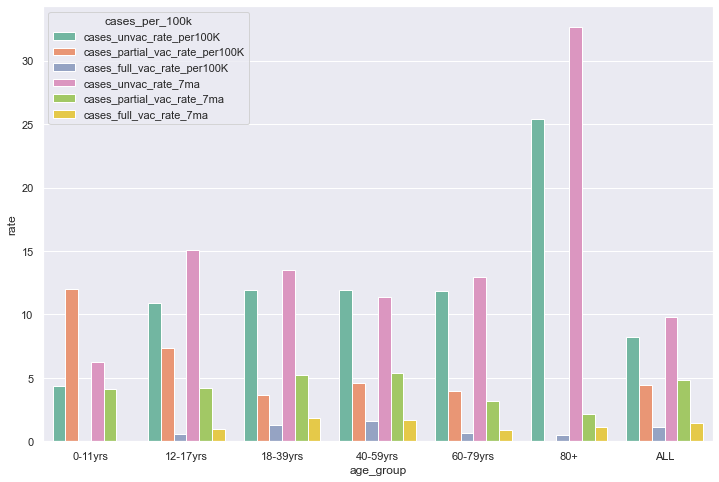

In [37]:
#ploting bar chart
plt.figure(figsize=(12,8))
sns.barplot(data=rate_by_vax_stkdf,y='rate',x='age_group',hue='cases_per_100k')